<a href="https://colab.research.google.com/github/BartekFranczak/CPO---MEL/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CPO LAB 2 

Pobranie plików do Colaba z własnego komputera


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving lab02.zip to lab02.zip


In [ ]:
from zipfile import ZipFile

file_name = '/content/lab02.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [32]:
import os.path
from os import path

if path.exists('/content/results') == False:
  os.mkdir('/content/results')

Operacje na plikach 

In [ ]:
from os import listdir 
from os.path import isfile, join, exists, getsize

my_path = '/content/'
my_files = [f for f in listdir(my_path) if isfile(join(my_path,f))]

print(my_files)
                                                  

['autor.txt', 'lab02.zip']


Wyszukiwanie plików z określonym rozszerzeniem 

In [ ]:
search_ext = lambda a,b: [a+'/'+ f for f in listdir(a) if f.endswith(b) ]
f_path = '/content/Nat'
f_ext = 'jpg'

my_files = search_ext(f_path, f_ext)
print(my_files)

['/content/Nat/18.jpg', '/content/Nat/14.jpg', '/content/Nat/8.jpg', '/content/Nat/9.jpg', '/content/Nat/19.jpg', '/content/Nat/5.jpg', '/content/Nat/20.jpg', '/content/Nat/4.jpg', '/content/Nat/17.jpg', '/content/Nat/23.jpg', '/content/Nat/1.jpg', '/content/Nat/2.jpg', '/content/Nat/21.jpg', '/content/Nat/25.jpg', '/content/Nat/13.jpg', '/content/Nat/24.jpg', '/content/Nat/11.jpg', '/content/Nat/15.jpg', '/content/Nat/22.jpg', '/content/Nat/6.jpg', '/content/Nat/10.jpg', '/content/Nat/3.jpg', '/content/Nat/7.jpg', '/content/Nat/12.jpg', '/content/Nat/16.jpg']


OBRAZY 


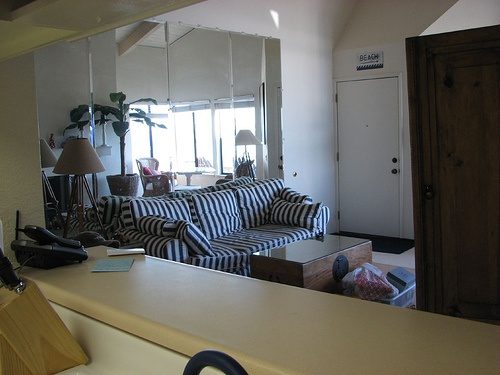

In [ ]:
import cv2

from google.colab.patches import cv2_imshow

im1 = cv2.imread(my_files[0])
cv2_imshow(im1)

Określony format zapisu 

In [ ]:
def next_result_path(sub_folder,ext):
  i=1
  while (isfile('/content/{}/result_{}.{}'.format(sub_folder,i,ext) )):
    i+=1

  return '/content/{}/result_{}.{}'.format(sub_folder,i,ext)

print(next_result_path('results','jpg'))

/content/results/result_1.jpg


In [ ]:
frm = 'png'
cv2.imwrite(next_result_path('results',frm),im1)

False

In [ ]:
frm = 'jpg'

cv2.imwrite(next_result_path('results',frm), im1, [int(cv2.IMWRITE_JPEG_QUALITY),10])

False

WYŚWIETLANIE WIELU OBRAZÓW 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt


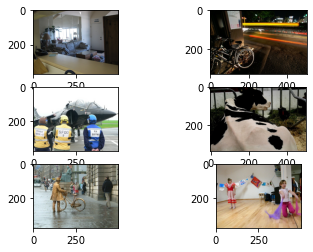

In [ ]:
plt.figure()

for i in range(0,6):
  plt.subplot(3,2,i+1)
  im_bgr = cv2.imread(my_files[i])
  im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
  plt.imshow(im_rgb)

frm = 'png'
plt.savefig(next_result_path('results',frm), format = frm)

Rozdzielczość 

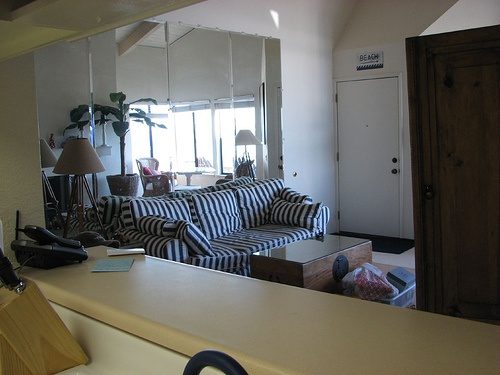

(375, 500, 3)


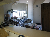

(37, 50, 3)


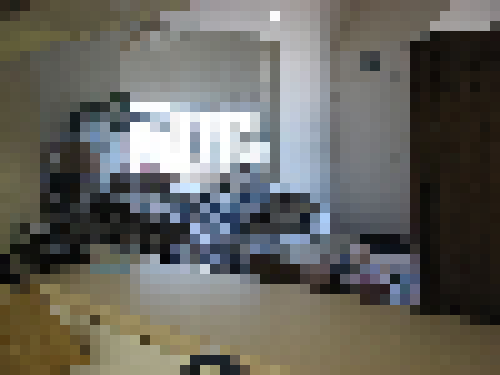

(375, 500, 3)


In [ ]:
from PIL.Image import NEAREST
im = cv2.imread(my_files[0])
im_shape = im.shape

cv2_imshow(im)
print(im_shape)

im_small = cv2.resize(im,(int(im_shape[1]/10),int(im_shape[0]/10)))

cv2_imshow(im_small)
print(im_small.shape)

im_big = cv2.resize(im_small, (im_shape[1],im_shape[0]), interpolation = cv2.INTER_NEAREST)
cv2_imshow(im_big)
print(im_big.shape)

Przestrzenie barw 

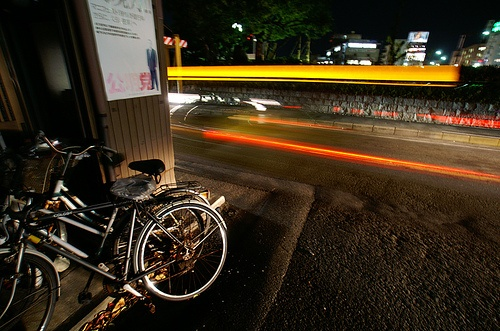

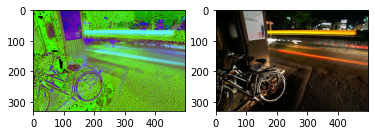

In [ ]:
im = cv2.imread(my_files[1])

im_bgr = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)

im_hsv = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2HSV)

cv2_imshow(im)

im_bgr = cv2.cvtColor(im_hsv, cv2.COLOR_HSV2BGR)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(im_hsv)
plt.subplot(1,2,2)
plt.imshow(im_bgr)

frm = 'png'
plt.savefig(next_result_path('results',frm),format = frm)

ZADANIA LABORATORIUM 


Baza obrazów

In [ ]:
path_nat ='/content/Nat'
path_syn ='/content/Syn'

files_nat = [join(path_nat,f) for f in listdir(path_nat) if isfile(join(path_nat,f))]
files_syn = [join(path_syn,f) for f in listdir(path_syn) if isfile(join(path_syn,f))]

# random files 
import random 

def pick_random_files(file_list,n):
  numbers = random.sample(range(0,len(file_list)),n)
  l = [file_list[n] for n in numbers]
  return l

im_database =  pick_random_files(files_nat,4) + pick_random_files(files_syn,4)
print(im_database)





['/content/Nat/7.jpg', '/content/Nat/16.jpg', '/content/Nat/12.jpg', '/content/Nat/4.jpg', '/content/Syn/8.png', '/content/Syn/4.png', '/content/Syn/22.jpg', '/content/Syn/19.jpg']


ZAD 1 

In [ ]:
#GIF
import imageio
gif_in = [cv2.cvtColor(cv2.imread(im), cv2.COLOR_BGR2RGB) for im in im_database]
imageio.mimsave('/content/results/zad1_1.gif', gif_in, fps=5)
print("Combined GIF size: ", getsize('/content/results/zad1_1.gif'))

Combined GIF size:  1082330


In [ ]:
import os

In [ ]:
def get_dir_size(dir):
  i=0
  for file in listdir(dir):
    i+= os.path.getsize(join(dir,file))
  return i

In [ ]:
#PNG
import shutil
frm = 'png'
if exists('/content/results/zad1_png'):
  shutil.rmtree('/content/results/zad1_png')
  

os.mkdir('/content/results/zad1_png')
for image in im_database:
  image = cv2.imread(image)
  
  cv2.imwrite(next_result_path('results/zad1_png',frm),image)

print("Combined PNG size: ", get_dir_size('/content/results/zad1_png'))


Combined PNG size:  2718895


In [30]:
#JPEG

def save_as_jpg_and_get_size(database,compression):
  frm = 'jpg'
  dir ='/content/results/jpg_'+str(compression)
  if exists(dir):
    shutil.rmtree(dir)
  os.mkdir(dir)
  size = 0
  for image_p in database:
    image = cv2.imread(image_p)
    path = next_result_path('results/jpg_'+str(compression),frm)
    cv2.imwrite(path, image, [cv2.IMWRITE_JPEG_QUALITY,compression])
    size += os.path.getsize(path)
  return size


In [31]:
#JPEG
print("Combined JPEG_30 size: ", save_as_jpg_and_get_size(im_database,30))
print("Combined JPEG_60 size: ", save_as_jpg_and_get_size(im_database,60))
print("Combined JPEG_90 size: ", save_as_jpg_and_get_size(im_database,90))

Combined JPEG_30 size:  140665
Combined JPEG_60 size:  219742
Combined JPEG_90 size:  509303


ZAD 2


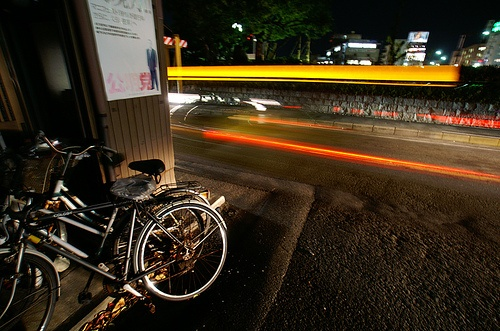

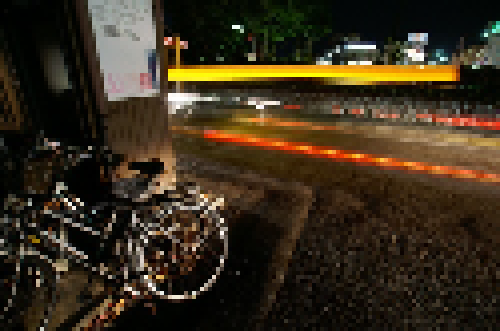

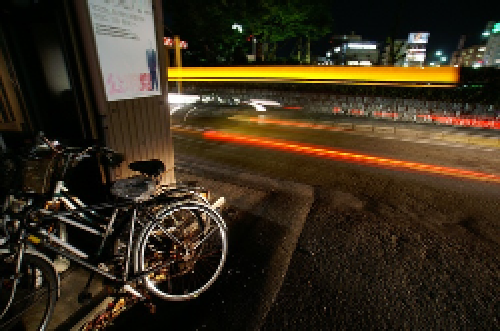

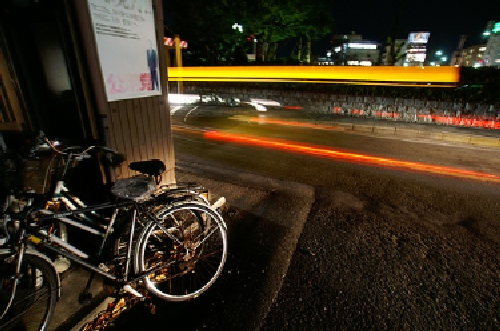

In [ ]:
from PIL.Image import NEAREST
im = cv2.imread(my_files[1])
im_shape = im.shape


im_small_1 = cv2.resize(im,(int(im_shape[1]*0.25),int(im_shape[0]*0.25)))
im_big_1 = cv2.resize(im_small_1, (im_shape[1],im_shape[0]), interpolation = cv2.INTER_NEAREST)

im_small_2 = cv2.resize(im,(int(im_shape[1]*0.5),int(im_shape[0]*0.5)))
im_big_2 = cv2.resize(im_small_2, (im_shape[1],im_shape[0]), interpolation = cv2.INTER_NEAREST)

im_small_3 = cv2.resize(im,(int(im_shape[1]*0.75),int(im_shape[0]*0.75)))
im_big_3 = cv2.resize(im_small_3, (im_shape[1],im_shape[0]), interpolation = cv2.INTER_NEAREST)


cv2_imshow(im)
cv2_imshow(im_big_1)
cv2_imshow(im_big_2)
cv2_imshow(im_big_3)




ZAD 3

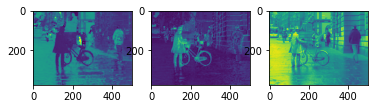

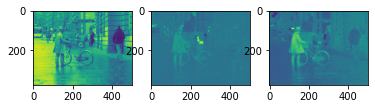

In [ ]:
im = cv2.imread(my_files[4])

im_hsv = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)

plt.figure()
for i in range(0,3):
  plt.subplot(1,3,i+1)
  gs_im = im_hsv[:,:,i]
  plt.imshow(gs_im)
plt.show()

im_Lab = cv2.cvtColor(im, cv2.COLOR_BGR2Lab)
plt.figure()
for i in range(0,3):
  plt.subplot(1,3,i+1)
  gs_im = im_Lab[:,:,i]
  plt.imshow(gs_im)
plt.show()